# Introducción a Numpy  <a class="tocSkip">

## Introducción

Dos paquetes que van a resultar muy importantes para nosotros son los paquetes **numpy** y **matplotlib**. Como con todos los módulos, se cargan utilizando la palabra `import`, tal como hicimos en los ejemplos anteriores. Existen variantes en la manera de importar los módulos que son "equivalentes". En este caso le vamos a dar un alias que sea más corto de tipear. Después podemos utilizar sus funciones y definiciones.


In [83]:
import numpy as np               # Importa el paquete numpy para trabajo numérico
import matplotlib.pyplot as plt  # Importa el paquete matplotlib para graficación

Un ejemplo muy común es la graficación de datos que obtuvimos previamente:

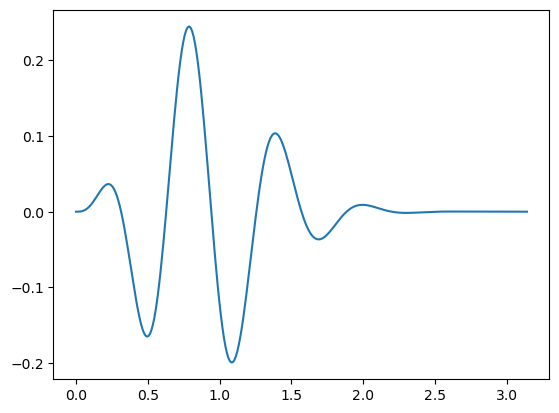

In [84]:
x, y = np.loadtxt('../data/ejemplo_plot_07_1.dat', unpack=True)
plt.plot(x, y)

## Lectura y escritura de datos a archivos

Numpy tiene funciones que permiten escribir y leer datos de varias maneras, tanto en formato *texto* como en *binario*. En general el modo *texto* ocupa más espacio pero puede ser leído y modificado con un editor.

Veamos qué datos hay en el archivo:

Hay dos columnas, en la primera fila hay texto, y en las siguientes hay valores separados por un espacio.

Dos funciones simples y útiles para entrada y salida de datos son `np.loadtxt()` para lectura,  y `np.savetxt()` para escritura.

In [85]:
x, y = np.loadtxt('../data/ejemplo_plot_07_1.dat', unpack=True)

La función `np.loadtxt()` carga estos valores a las variables `x` e `y`

In [86]:
len(x), len(y)

(300, 300)

In [87]:
print(x[:10])

[0.         0.010507   0.021014   0.031521   0.042028   0.05253499
 0.06304199 0.07354899 0.08405599 0.09456299]


Vemos que, con este uso, la variable `x` contiene los valores de la primera columna y la variable `y` los de la segunda.

Para grabar datos a un archivo le damos como primer argumento el nombre del archivo y como segundo los datos a guardar. Vamos a ver detalles más adelante.

In [90]:
np.savetxt('test.out', y)

In [ ]:
!head test.out


En la primera línea hay texto explicativo, en las siguientes líneas el archivo tiene dos columnas.

Veamos que tipo de variable son `x` e `y`:

In [89]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

Como vemos, el tipo de la variable **no es una lista** sino un nuevo tipo: **ndarray**, o simplemente **array**. Veamos cómo trabajar con ellos.

## Características de *arrays* en **Numpy**

Numpy define unas nuevas estructuras llamadas *ndarrays* o *arrays* para trabajar con vectores de datos, en una dimensión o más dimensiones ("matrices").
Los arrays son variantes de las listas de python preparadas para trabajar a mayor velocidad y menor consumo de memoria. Por ello se requiere que los arrays sean menos generales y versátiles que las listas usuales. Analicemos brevemente las diferencias entre estos tipos y las consecuencias que tendrá en su uso para nosotros.

### Comparación de listas y *arrays*

Comparemos como operamos sobre un conjunto de números cuando los representamos por una lista, o por un array:

In [91]:
dlist = [1.5, 3.8, 4.9, 12.3, 27.2, 35.8, 70.2, 90., 125., 180.]

In [92]:
d = np.array(dlist)

In [93]:
d is dlist

False

In [94]:
print(dlist)

[1.5, 3.8, 4.9, 12.3, 27.2, 35.8, 70.2, 90.0, 125.0, 180.0]


In [95]:
print(d)

[  1.5   3.8   4.9  12.3  27.2  35.8  70.2  90.  125.  180. ]


Veamos cómo se hace para operar con estos dos tipos. Si los valores representan ángulos en grados, hagamos la conversión a radianes (radián = $\pi/180$ grado)

In [96]:
from math import pi
drlist= [a*pi/180 for a in dlist]

In [97]:
print(drlist)

[0.02617993877991494, 0.06632251157578452, 0.08552113334772216, 0.21467549799530256, 0.47472955654245763, 0.62482787221397, 1.2252211349000193, 1.5707963267948966, 2.1816615649929116, 3.141592653589793]


In [100]:
dr= d*(pi/180)

In [101]:
print(dr)

[0.02617994 0.06632251 0.08552113 0.2146755  0.47472956 0.62482787
 1.22522113 1.57079633 2.18166156 3.14159265]


Vemos que el modo de trabajar es más simple ya que los array permiten trabajar con operaciones elemento-a-elemento mientras que para las listas tenemos que usar comprensiones de listas. Veamos otros ejemplos:

In [102]:
print([np.sin(a*pi/180) for a in dlist])

[0.02617694830787315, 0.06627390040000014, 0.08541692313736748, 0.2130303862749766, 0.4570979270586941, 0.5849576749872153, 0.9408807689542255, 1.0, 0.819152044288992, 1.2246467991473532e-16]


In [103]:
print(np.sin(np.deg2rad(d)))

[2.61769483e-02 6.62739004e-02 8.54169231e-02 2.13030386e-01
 4.57097927e-01 5.84957675e-01 9.40880769e-01 1.00000000e+00
 8.19152044e-01 1.22464680e-16]


Además de la simplicidad para trabajar con operaciones que actúan sobre cada elemento, el paquete tiene una gran cantidad de funciones y constantes definidas (como por ejemplo `np.pi` para $\pi$).

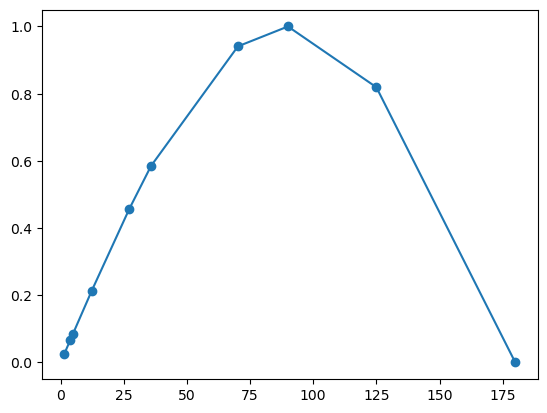

In [104]:
plt.plot(d, np.sin(np.deg2rad(d)),'o-')
plt.show()

### Uso de memoria de listas y arrays

Las listas son sucesiones de elementos, completamente generales y no necesariamente todos iguales. Un esquema de su representación interna se muestra en el siguiente gráfico para una lista de números enteros (Las figuras y el análisis de esta sección son de www.python-course.eu/numpy.php)

![Representación en memoria de una lista](figuras/list_structure.png)

Básicamente en una lista se guarda información común a cualquier lista, un lugar de almacenamiento que referencia donde buscar cada uno de sus elementos (que puede ser un objeto diferente) y luego el lugar efectivo para guardar cada elemento. Veamos cuanta memoria se necesita para guardar una lista de enteros:

In [105]:
from sys import getsizeof
lst = [24, 12, 57]
size_of_list_object = getsizeof(lst)   # La lista sin sus datos
#size_of_elements = getsizeof(lst[0]) + getsizeof(lst[1]) + getsizeof(lst[2])
size_of_elements = sum(getsizeof(l) for l in lst)
total_list_size = size_of_list_object + size_of_elements
print("Tamaño sin considerar los elementos: ", size_of_list_object)
print("Tamaño de los elementos: ", size_of_elements)
print("Tamaño total: ", total_list_size)

Tamaño sin considerar los elementos:  88
Tamaño de los elementos:  84
Tamaño total:  172


Para calcular cuánta memoria se usa en cada parte de una lista analicemos el tamaño de distintos casos:

In [106]:
print('Una lista vacía ocupa: {} bytes'.format(getsizeof([])))
print('Una lista con un elem: {} bytes'.format(getsizeof([24])))
print('Una lista con 2 elems: {} bytes'.format(getsizeof([24,12])))
print('Un entero en Python  : {} bytes'.format(getsizeof(24)))

Una lista vacía ocupa: 56 bytes
Una lista con un elem: 64 bytes
Una lista con 2 elems: 72 bytes
Un entero en Python  : 28 bytes


Vemos que la "Información general de listas" ocupa **56 bytes**, y la referencia a cada elemento entero ocupa adicionalmente **8 bytes**, por lo que la lista con dos elementos ocupa **72 bytes**.
Además, cada elemento, un entero de Python, en este caso ocupa **28 bytes**, por lo que el tamaño total de una **lista** de $n$ números enteros será:

$$  M_{L}(n) = 56 + n \times 8 + n \times 28 $$

In [ ]:
# Notar que no siempre es fácil identificar el tamaño correcto
print('Una lista con 3 elems: {} bytes'.format(getsizeof([24,12,57])))
print('Una lista con 4 elems: {} bytes'.format(getsizeof([24,12,57,38])))
print('Una lista con 5 elems: {} bytes'.format(getsizeof([24,12,57,38,47])))

En contraste, los *arrays* deben ser todos del mismo tipo por lo que su representación es más simple (por ejemplo, no es necesario guardar sus valores separadamente)

![Representación en memoria de una lista](figuras/array_structure.png)

In [107]:
a = np.array(lst, dtype='int')
print(getsizeof(a))

136


Para analizar como se distribuye el consumo de memoria en un array vamos a calcular el tamaño de cada uno de los elementos como hicimos con las listas:

In [108]:
print('Un array vacío ocupa: {} bytes'.format(getsizeof(np.array([]))))
print('Un array con un elem: {} bytes'.format(getsizeof(np.array([24]))))
print('Un array con 2 elems: {} bytes'.format(getsizeof(np.array([24,12]))))
print('Un entero de Numpy es: {}'.format(type(a[0])))
print('Un entero de Numpy usa: {}'.format(getsizeof(a[0])))

Un array vacío ocupa: 112 bytes
Un array con un elem: 120 bytes
Un array con 2 elems: 128 bytes
Un entero de Numpy es: <class 'numpy.int64'>
Un entero de Numpy usa: 32


Vemos que la información general sobre arrays ocupa **96 bytes** (en contraste a **64** para listas), y por cada elemento otros **8 bytes** adicionales (`numpy.int64` corresponde a 64 bits), por lo que el tamaño total será:

$$  M_{a}(n) = 96 + n \times 8 $$

In [109]:
from sys import getsizeof
lst1 = list(range(1000))
total_list_size = getsizeof(lst1) + sum(getsizeof(l) for l in lst1)
print("Tamaño total de la lista: ", total_list_size)
a1 = np.array(lst1)
print("Tamaño total de array: ", getsizeof(a1))

Tamaño total de la lista:  36056
Tamaño total de array:  8112


### Velocidad de **Numpy**
Una de las grandes ventajas de usar *Numpy* está relacionada con la velocidad de cálculo. Veamos (superficialmente) esto

In [115]:
# %load scripts/timing.py
# Ejemplo del libro en www.python-course.eu/numpy.php

import numpy as np
from timeit import Timer
Ndim = 100000


def pure_python_version():
  X = range(Ndim)
  Y = range(Ndim)
  Z = []
  for i in range(len(X)):
    Z.append(X[i] + Y[i])
  return Z


def numpy_version():
  X = np.arange(Ndim)
  Y = np.arange(Ndim)
  Z = X + Y
  return Z

timer_obj1 = Timer("pure_python_version()", "from __main__ import pure_python_version")
timer_obj2 = Timer("numpy_version()", "from __main__ import numpy_version")
t1 = timer_obj1.timeit(10)
t2 = timer_obj2.timeit(10)

print(f"Numpy es en este ejemplo {t1 / t2 : .3f} más rápido")


Numpy es en este ejemplo  105.120 más rápido


Como vemos, utilizar *Numpy* puede ser considerablemente más rápido que usar *Python puro*.

## Creación de *arrays* en **Numpy**

Un `array` en numpy es un tipo de variable parecido a una lista, pero está optimizado para realizar trabajo numérico.

Todos los elementos deben ser del mismo tipo, y además de los valores, contiene información sobre su tipo. Veamos algunos ejemplos de cómo crearlos y utilizarlos:

### Creación de *Arrays* unidimensionales

In [116]:
i1 = np.array([1, 2, 3, 1, 5, 1, 9, 22, 0])
r1 = np.array([1.4 ,2.3 ,3.0 ,1, 5, 1, 9, 22, 0])

In [117]:
print(i1)
print(r1)

[ 1  2  3  1  5  1  9 22  0]
[ 1.4  2.3  3.   1.   5.   1.   9.  22.   0. ]


In [118]:
print('tipo de i1: {} \ntipo de r1: {}'.format(i1.dtype, r1.dtype))

tipo de i1: int64 
tipo de r1: float64


In [119]:
print('Para i1:\n  Número de dimensiones: {}\n  Longitud: {}'.format(np.ndim(i1), len(i1)))

Para i1:
  Número de dimensiones: 1
  Longitud: 9


In [121]:
print('Para r1:\n  Número de dimensiones: {}\n  Longitud: {}'.format(r1.ndim, len(r1)))

Para r1:
  Número de dimensiones: 1
  Longitud: 9


### Arrays multidimensionales

Podemos crear explícitamente *arrays* multidimensionales con la función `np.array` si el argumento es una lista anidada

In [122]:
L = [ [1, 2, 3], [.2, -.2, -1], [-1, 2, 9], [0, 0.5, 0] ]

A = np.array(L)

In [123]:
A

array([[ 1. ,  2. ,  3. ],
       [ 0.2, -0.2, -1. ],
       [-1. ,  2. ,  9. ],
       [ 0. ,  0.5,  0. ]])

In [124]:
print(A)

[[ 1.   2.   3. ]
 [ 0.2 -0.2 -1. ]
 [-1.   2.   9. ]
 [ 0.   0.5  0. ]]


In [125]:
print(np.ndim(A),A.ndim) # Ambos son equivalentes

2 2


In [126]:
print(len(A))

4


Vemos que la dimensión de `A` es 2, pero la longitud que me reporta **Python** corresponde al primer eje. Los *arrays* tienen un atributo que es la "forma" (shape)

In [127]:
print(A.shape)

(4, 3)


In [128]:
r1.shape # una tupla de un solo elemento

(9,)

### Generación de datos equiespaciados

Para obtener datos equiespaciados hay dos funciones complementarias

In [139]:
a1 = np.arange(0,190,10)
a2 = np.linspace(0,180,19)

In [140]:
a1

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180])

In [141]:
a2

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180.])

Como vemos, ambos pueden dar resultados similares, y es una cuestión de conveniencia cual utilizar. El uso es:

```python
np.arange([start,] stop[, step,], dtype=None)

np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
```

Mientras que a `arange()` le decimos cuál es el paso a utilizar, a `linspace()` debemos (podemos) darle como tercer argumento el número de valores que queremos.

In [145]:
# Si queremos que devuelva enteros:
np.arange(0,180.,7.8, dtype=int)

array([  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84,
        91,  98, 105, 112, 119, 126, 133, 140, 147, 154, 161])

In [146]:
# Pedimos que devuelva el paso también
v1, step1 = np.linspace(0,10,20, endpoint=True, retstep=True)
v2, step2 = np.linspace(0,10,20, endpoint=False, retstep=True)

In [147]:
print(step1)
print(step2)

0.5263157894736842
0.5


In [148]:
v1

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [149]:
v2

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

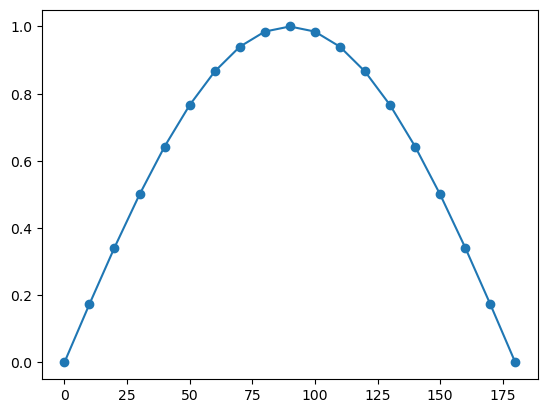

In [150]:
plt.plot(a2, np.sin(np.deg2rad(a2)),'o-')
plt.show()

Además de valores linealmente espaciados podemos obtener valores espaciados en escala logarítmica

In [155]:
w = np.logspace(0,10,10)

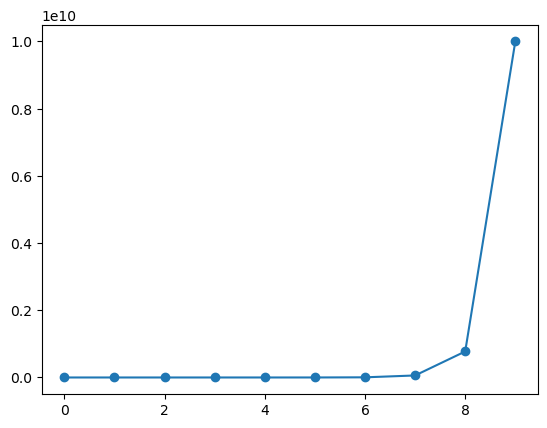

In [156]:
plt.plot( w, 'o-')
plt.show()

In [157]:
w1 = np.logspace(0,2,3) # Start y Stop son los exponentes
print(w1)

[  1.  10. 100.]


In [158]:
w2 = np.geomspace(1,100,3) # Start y Stop son los valores
print(w2)

[  1.  10. 100.]


### Otras formas de creación

Hay otras maneras de crear **numpy arrays**. Algunas, de las más comunes es cuando necesitamos crear un array con todos ceros o unos o algún valor dado

In [159]:
a = np.zeros(5)

In [160]:
a.dtype                         # El tipo default es float de 64 bits

dtype('float64')

In [161]:
print(a)

[0. 0. 0. 0. 0.]


In [162]:
i= np.zeros(5, dtype=int)

In [163]:
print(i)

[0 0 0 0 0]


In [164]:
i.dtype

dtype('int64')

In [165]:
c= np.zeros(5,dtype=complex)
print(c)
print(c.dtype)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
complex128


En lugar de inicializarlo en cero podemos inicializarlo con algún valor

In [166]:
np.ones(5, dtype=complex)     # Algo similar pero inicializando a unos

array([1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])

Ya vimos que también podemos inicializarlos con valores "equiespaciados" con `np.arange()`, con `np.linspace()` o con `np.logspace()`

In [167]:
v = np.arange(2,15,2) # Crea un array con una secuencia (similar a la función range)

Para crear *arrays* multidimensionales usamos:


In [168]:
np.ones((4,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [169]:
np.ones((4,3,6))

array([[[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]])

In [170]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [171]:
np.eye(3,7)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]])

En este último ejemplo hemos creado matrices con unos en la diagonal y ceros en todos los demás lugares.

## Acceso a los elementos

El acceso a los elementos tiene una forma muy parecida a la de las listas (pero no exactamente igual). 

In [172]:
print(r1)

[ 1.4  2.3  3.   1.   5.   1.   9.  22.   0. ]


Si queremos uno de los elementos usamos la notación:

In [173]:
print(r1[0], r1[3], r1[-1])

1.4 1.0 0.0


y para "tajadas" (*slices*)

In [174]:
print(r1[:3])

[1.4 2.3 3. ]


In [175]:
print(r1[-3:])

[ 9. 22.  0.]


In [176]:
print(r1[5:7])

[1. 9.]


In [177]:
print(r1[0:8:2])

[1.4 3.  5.  9. ]


Como con vectores unidimensionales, con arrays multidimensionales, se puede ubicar un elemento o usar *slices*:

In [178]:
arr = np.arange(55).reshape((5,11))

In [179]:
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
       [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43],
       [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]])

In [180]:
print("primer y segundo elementos", arr[0,0], arr[0,1])

primer y segundo elementos 0 1


In [181]:
print( 'Slicing parte de la segunda fila :', arr[1, 2:4])
print('Todas las filas, tercera columna :', arr[:, 2])

Slicing parte de la segunda fila : [13 14]
Todas las filas, tercera columna : [ 2 13 24 35 46]


In [183]:
print( 'Primera fila   :\n', arr[0], '\nes igual a :\n', arr[0,:])

Primera fila   :
 [ 0  1  2  3  4  5  6  7  8  9 10] 
es igual a :
 [ 0  1  2  3  4  5  6  7  8  9 10]


In [184]:
print( 'Segunda fila   :\n', arr[1], '\nes igual a :\n', arr[1,:])

Segunda fila   :
 [11 12 13 14 15 16 17 18 19 20 21] 
es igual a :
 [11 12 13 14 15 16 17 18 19 20 21]


In [185]:
print( 'Primera columna:', arr[:,0])

Primera columna: [ 0 11 22 33 44]


In [186]:
print( 'Última columna : \n', arr[:,-1])

Última columna : 
 [10 21 32 43 54]


In [187]:
print( 'Segunda fila, elementos impares (0,2,...) : ', arr[1,::2])

Segunda fila, elementos impares (0,2,...) :  [11 13 15 17 19 21]


In [188]:
print( 'Segunda fila, todos los elementos pares : ', arr[1,1::2])

Segunda fila, todos los elementos pares :  [12 14 16 18 20]


Cuando el *slicing* se hace de la forma `[i:f:s]` significa que tomaremos los elementos entre `i` (inicial), hasta `f` (final, no incluido), pero tomando sólo uno de cada `s` (stride) elementos

![](figuras/numpy_indexing.png) 

En [Scipy Lectures at http://scipy-lectures.github.io](http://scipy-lectures.github.io) hay una descripción del acceso a arrays.

  

-----

## Ejercicios 08 (a)

1. Genere arrays en 2d, cada uno de tamaño 10x10 con:
   1. Un array con valores 1 en la "diagonal principal" y 0 en el resto (Matriz identidad).
   
   2. Un array con valores 0 en la "diagonal principal" y 1 en el resto.
   
   3. Un array con valores 1 en los bordes y 0 en el interior.
   
   4. Un array con números enteros consecutivos (empezando en 1) en los bordes y 0 en el interior.

2. Diga qué resultado produce el siguiente código, y explíquelo
  ```python
  # Ejemplo propuesto por Jake VanderPlas
  print(sum(range(5),-1))
  from numpy import *
  print(sum(range(5),-1))
  ```

-----